In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


레퍼런스
1. [유의성검정](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=modernyoon&logNo=221581004731)
2. [부호순위검정](https://lovelydiary.tistory.com/369)
3. [R TSclust의 diss.ACF](https://search.r-project.org/CRAN/refmans/TSclust/html/diss.ACF.html)

## 통계파트 1번
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오
1. 귀무가설, 연구가설 세우기  
2. 유효한 데이터의 개수는?  
3. 검정통계량 및 연구가설 채택 여부를 작성하라


In [ ]:
import pandas as pd
import numpy as np
import scipy

df1 = pd.read_csv('/content/drive/MyDrive/data/adp/problem2.csv')
df1.head()

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000


1.   
귀무가설: 진공관의 수명이 1만시간이다. (μ = 10,000, i.e difference = 0)  
연구가설: 진공관의 수명이 1만시간이 아니다. (μ != 10,000 )

2. 샘플의 수 문제로 중심극한정리를 만족하지 않으므로 해당 검정은 비모수 방법인 윌콕슨 부호순위 검정을 이용한다. 각 샘플의 수명에서 10,000을 뺀 값으로 부호순위검정을 통해 실질적으로 새로운 샘플의 mu = 0 을 만족하는지 확인한다. 만약 mu = 0 이라면 원 데이터의 평균이 10,000이라고 말할 수 있다. 
윌콕슨 부호순위 검정은 부호를 기준으로 하기 떄문에 0은 계산에 유의한 데이터가 아니다. 따라서 2번 문제의 답은 각 데이터에 10,000을 뺐을 때 0이 되지 않는 데이터의 개수이다. 
아래 코드와 같이 유효한 데이터는 총 8개임을 알 수 있다. 

In [ ]:
testdata1 = list(df1['life span'] - 10000)
while 0 in testdata1:
  testdata1.remove(0)
len(testdata1)

8

3. 윌콕슨 부호순위 검정을 이용해 유의수준 5%에서 부호순위 검정을 하면, 결과는 다음과 같다. 

In [ ]:
from scipy.stats import wilcoxon
w, p = wilcoxon(df1['life span'] - 10000)
w,p

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(8.5, 0.18289327757982765)

양측검정을 수행했을 시 p 값은 약 0.18 정도로 유의수준 5%에서 귀무가설을 채택한다. 따라서 해당 공정의 진공관 수명은 10,000이라고 말할 수 있다. 

## 통계파트 2번 (시계열)
코로나 시계열 데이터
1. ACF 함수에 따른 거리 계산
2. 계층적 군집 분석을 위해 덴드로그램 작성

Autocorrelation-based dissimilarity 이라는 키워드의 문제인데 자료가 많진 않네요.. 


** 여담...R에는 TSdist라는 패키지 안에 diss.ACF 메서드가 ACF기반 Distance를 자동으로 구해줍니다. Python은 rpy2라는 패키지를 통해서 R에 있는 패키지를 가져올 순 있는데 이 패키지를 ADP에서 지원해주지 않다보니... 직접 코딩해서 푸는 수 밖에 없는 것 같네요. ADP에서 파이썬 ~~많이~~ 좀 불리한 것 같습니다😠

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/data/adp/problem3_covid.csv')
df2.head()

,location,date,new_cases
0,Austria,2021-01-01,2096.0
1,Austria,2021-01-02,1391.0
2,Austria,2021-01-03,1466.0
3,Austria,2021-01-04,1642.0
4,Austria,2021-01-05,2311.0


In [ ]:
df2.tail()

,location,date,new_cases
12195,Vanuatu,2021-10-28,0.0
12196,Vanuatu,2021-10-29,0.0
12197,Vanuatu,2021-10-30,0.0
12198,Vanuatu,2021-10-31,0.0
12199,Vanuatu,2021-11-01,0.0


In [ ]:
## location별로 데이터 수가 같은지 확인
df2.groupby(['location']).count()

,date,new_cases
location,,
Austria,305,305
Bangladesh,305,305
Bhutan,305,305
Chile,305,305
Colombia,305,305
Costa Rica,305,305
Dominica,305,305
Dominican Republic,305,305
Eswatini,305,305


데이터 개수가 맞지 않는 location은 날짜는 있는데 결측값으로 처리되어 있음. 결측값을 0으로 넣고 클러스터링을 할지, 아예 처음부터 빼고 시작할지 고민함. (결측값을 0으로 처리하는 이유는 Palau의 경우에 결측값이 실제 값보다 많아서 예측해서 넣는 의미가 없을 정도라고 생각했기 때문)

In [ ]:
from datetime import datetime ## date를 datetime 형식으로 바꿔줌
new_date = [datetime.strptime(d, '%Y-%m-%d') for d in list(df2['date'])]
df2_ = df2.copy(deep = True)
df2_['date'] = new_date

In [ ]:
df2_ = df2_.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  


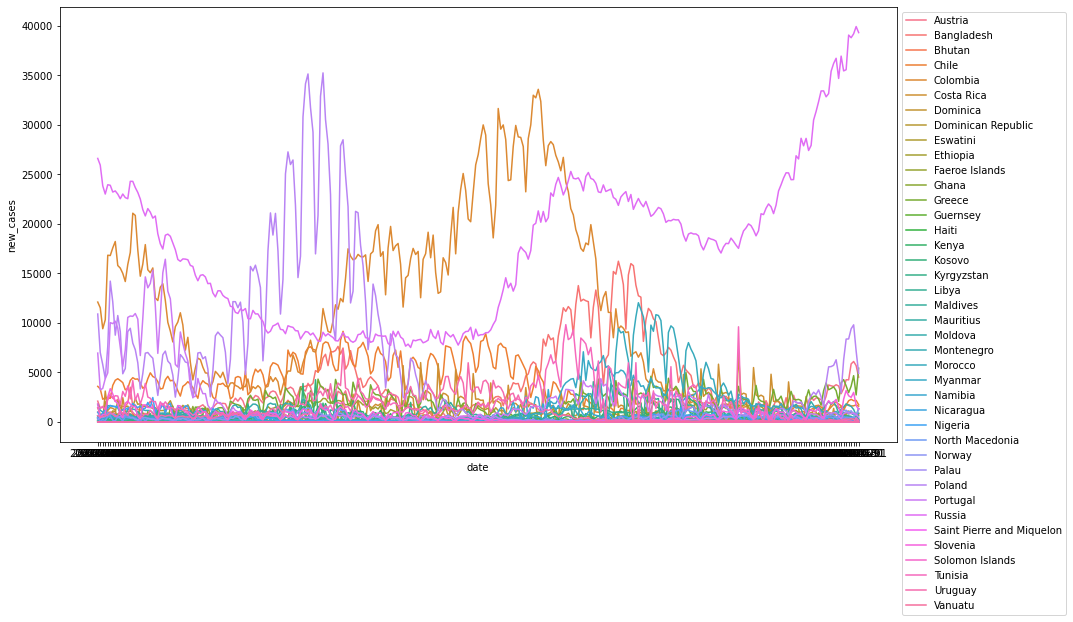

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='date', y='new_cases', hue='location', data=df2)
plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.locator_params(axis='x', nbins=10)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

그래프가 너무 복잡하다.. 

1. ACF를 statsmodel을 이용하여 10차까지 계산하면 다음과 같다. 

In [ ]:
## statsmodel acf 함수를 이용해서 계산할 수 있다는데 난 그 함수를 쓰면 nan값으로만 출력된다... 왜일까
## 대신 acf 정의에 입각한 함수를 직접 만들어서 계산하면 결과값이 출력된다
def acf(series, k):
    mean = series.mean()
    denominator = np.sum(np.square(series-mean))
    numerator = np.sum((series-mean)*(series.shift(k)-mean))
    acf_val = numerator/denominator
    return acf_val

In [ ]:
[acf(df2['new_cases'],k) for k in range(11)]

[1.0,
 0.9762579763144286,
 0.9552450657979111,
 0.942056926378632,
 0.9335856953857482,
 0.9288548603145289,
 0.9317127744569833,
 0.9329997008222233,
 0.9141790237805046,
 0.8932813286121575,
 0.8784448450493321]

## 통계파트 3번 (교차분석)
아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라
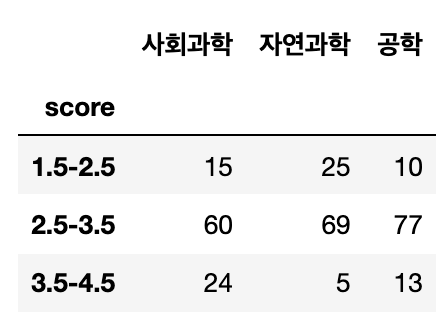
1. 귀무가설, 연구가설 세우기
2. 학과와 성적이 독립일 경우의 기댓값을 구하시오
3. 검정통계량 구하고 연구가설의 채택여부 작성

1. 학과와 성적의 연관성을 파악하기 위해서는 카이제곱검정의 독립성 검정을 이용해야 한다. 이 때 귀무가설과 연구가설은 다음과 같다.   
귀무가설: 학과와 성적은 독립이다. 
연구가설: 학과와 성적은 독립이 아니다. 
2. 학과와 성적이 독립인 경우, 랜덤한 상태로 전체 도수가 균일하게 분배된다. 독립인 경우의 기대값은 python 함수를 사용하여 아래와 같이 계산할 수 있다. 

In [ ]:
from scipy.stats import chi2_contingency
testdata3 = np.array([[15, 25, 10], [60, 69, 77], [24, 5, 13]])
g, p, dof, expctd = chi2_contingency(testdata3, lambda_="log-likelihood")  ##순서대로 통계량, p값, 자유도, 독립상태의 기대값
expctd

array([[16.61073826, 16.61073826, 16.77852349],
       [68.43624161, 68.43624161, 69.12751678],
       [13.95302013, 13.95302013, 14.09395973]])

3. 2번의 코드에 이어서 카이제곱 독립성 검정을 수행한 검정통계량은 아래와 같다. 

In [ ]:
g

22.655415564321043

또한 귀무가설 아래에서의 p값은 아래와 같은데, 약 0.0001로 유의수준 5%에서 귀무가설이 기각됨을 알 수 있다. 
따라서 학과와 성적 간에는 연관성이 존재한다. 

In [ ]:
p

0.00014836154552323375